# HepatitisCdata Analysize


## Describing the data 

the data comes from kaggle `https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset`  

data contains attribtes below   
|name|comments|
|:---:|:---:|
|Unnamed: 0|the patient id|
|Category|diagnosis (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')|
|Age|the age of this patient, in years|
|Sex|f,m, the gender|
|ALB| data from the laboratory and we don't need to understand the actually meaning| 
|ALP| data from the laboratory and we don't need to understand the actually meaning|
|ALT| data from the laboratory and we don't need to understand the actually meaning|
|AST| data from the laboratory and we don't need to understand the actually meaning|
|BIL| data from the laboratory and we don't need to understand the actually meaning|
|CHE| data from the laboratory and we don't need to understand the actually meaning|
|CHOL| data from the laboratory and we don't need to understand the actually meaning|
|GGT| data from the laboratory and we don't need to understand the actually meaning|
|PROT| data from the laboratory and we don't need to understand the actually meaning|

## Main objective of this analysis  

the objective of this analysis is to predict the Category of the given data

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
RS = 708

In [3]:
raw_data = pd.read_csv("./HepatitisCdata.csv")
raw_data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### DEA 

let's take a glance about the data.

we find there has some missing value, and we fill it with the value before it.

In [19]:
# is there any null value?

raw_data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [20]:
raw_data.fillna(method="ffill", inplace=True)

/tmp/ipykernel_255795/2040911806.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_data.fillna(method="ffill", inplace=True)


In [21]:
raw_data.isnull().sum() # no null value here we are good to go.

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [22]:
def data_clean(df:pd.DataFrame,le_y,le_s):
    # in this func, we will
    # 1. dorp the ID column
    # 2. clean the Category cloume and encode them with label encoder
    # 3. encode the Sex col with 0,1
    df_temp = df.drop('Unnamed: 0',axis=1) #  step 1
    df_temp["Category"] = le_y.transform(df["Category"]) # step 2
    df_temp["Sex"] = le_s.transform(df["Sex"]) # step 3
    return df_temp

le_y = LabelEncoder().fit(['0=Blood Donor',
                                '0s=suspect Blood Donor',
                                '1=Hepatitis',
                                '2=Fibrosis',
                                '3=Cirrhosis'])
le_s = LabelEncoder().fit(['m', 'f'])
df = data_clean(df=raw_data, le_y=le_y, le_s=le_s)

from the pairplot below we can find some feature has a linear ralationship

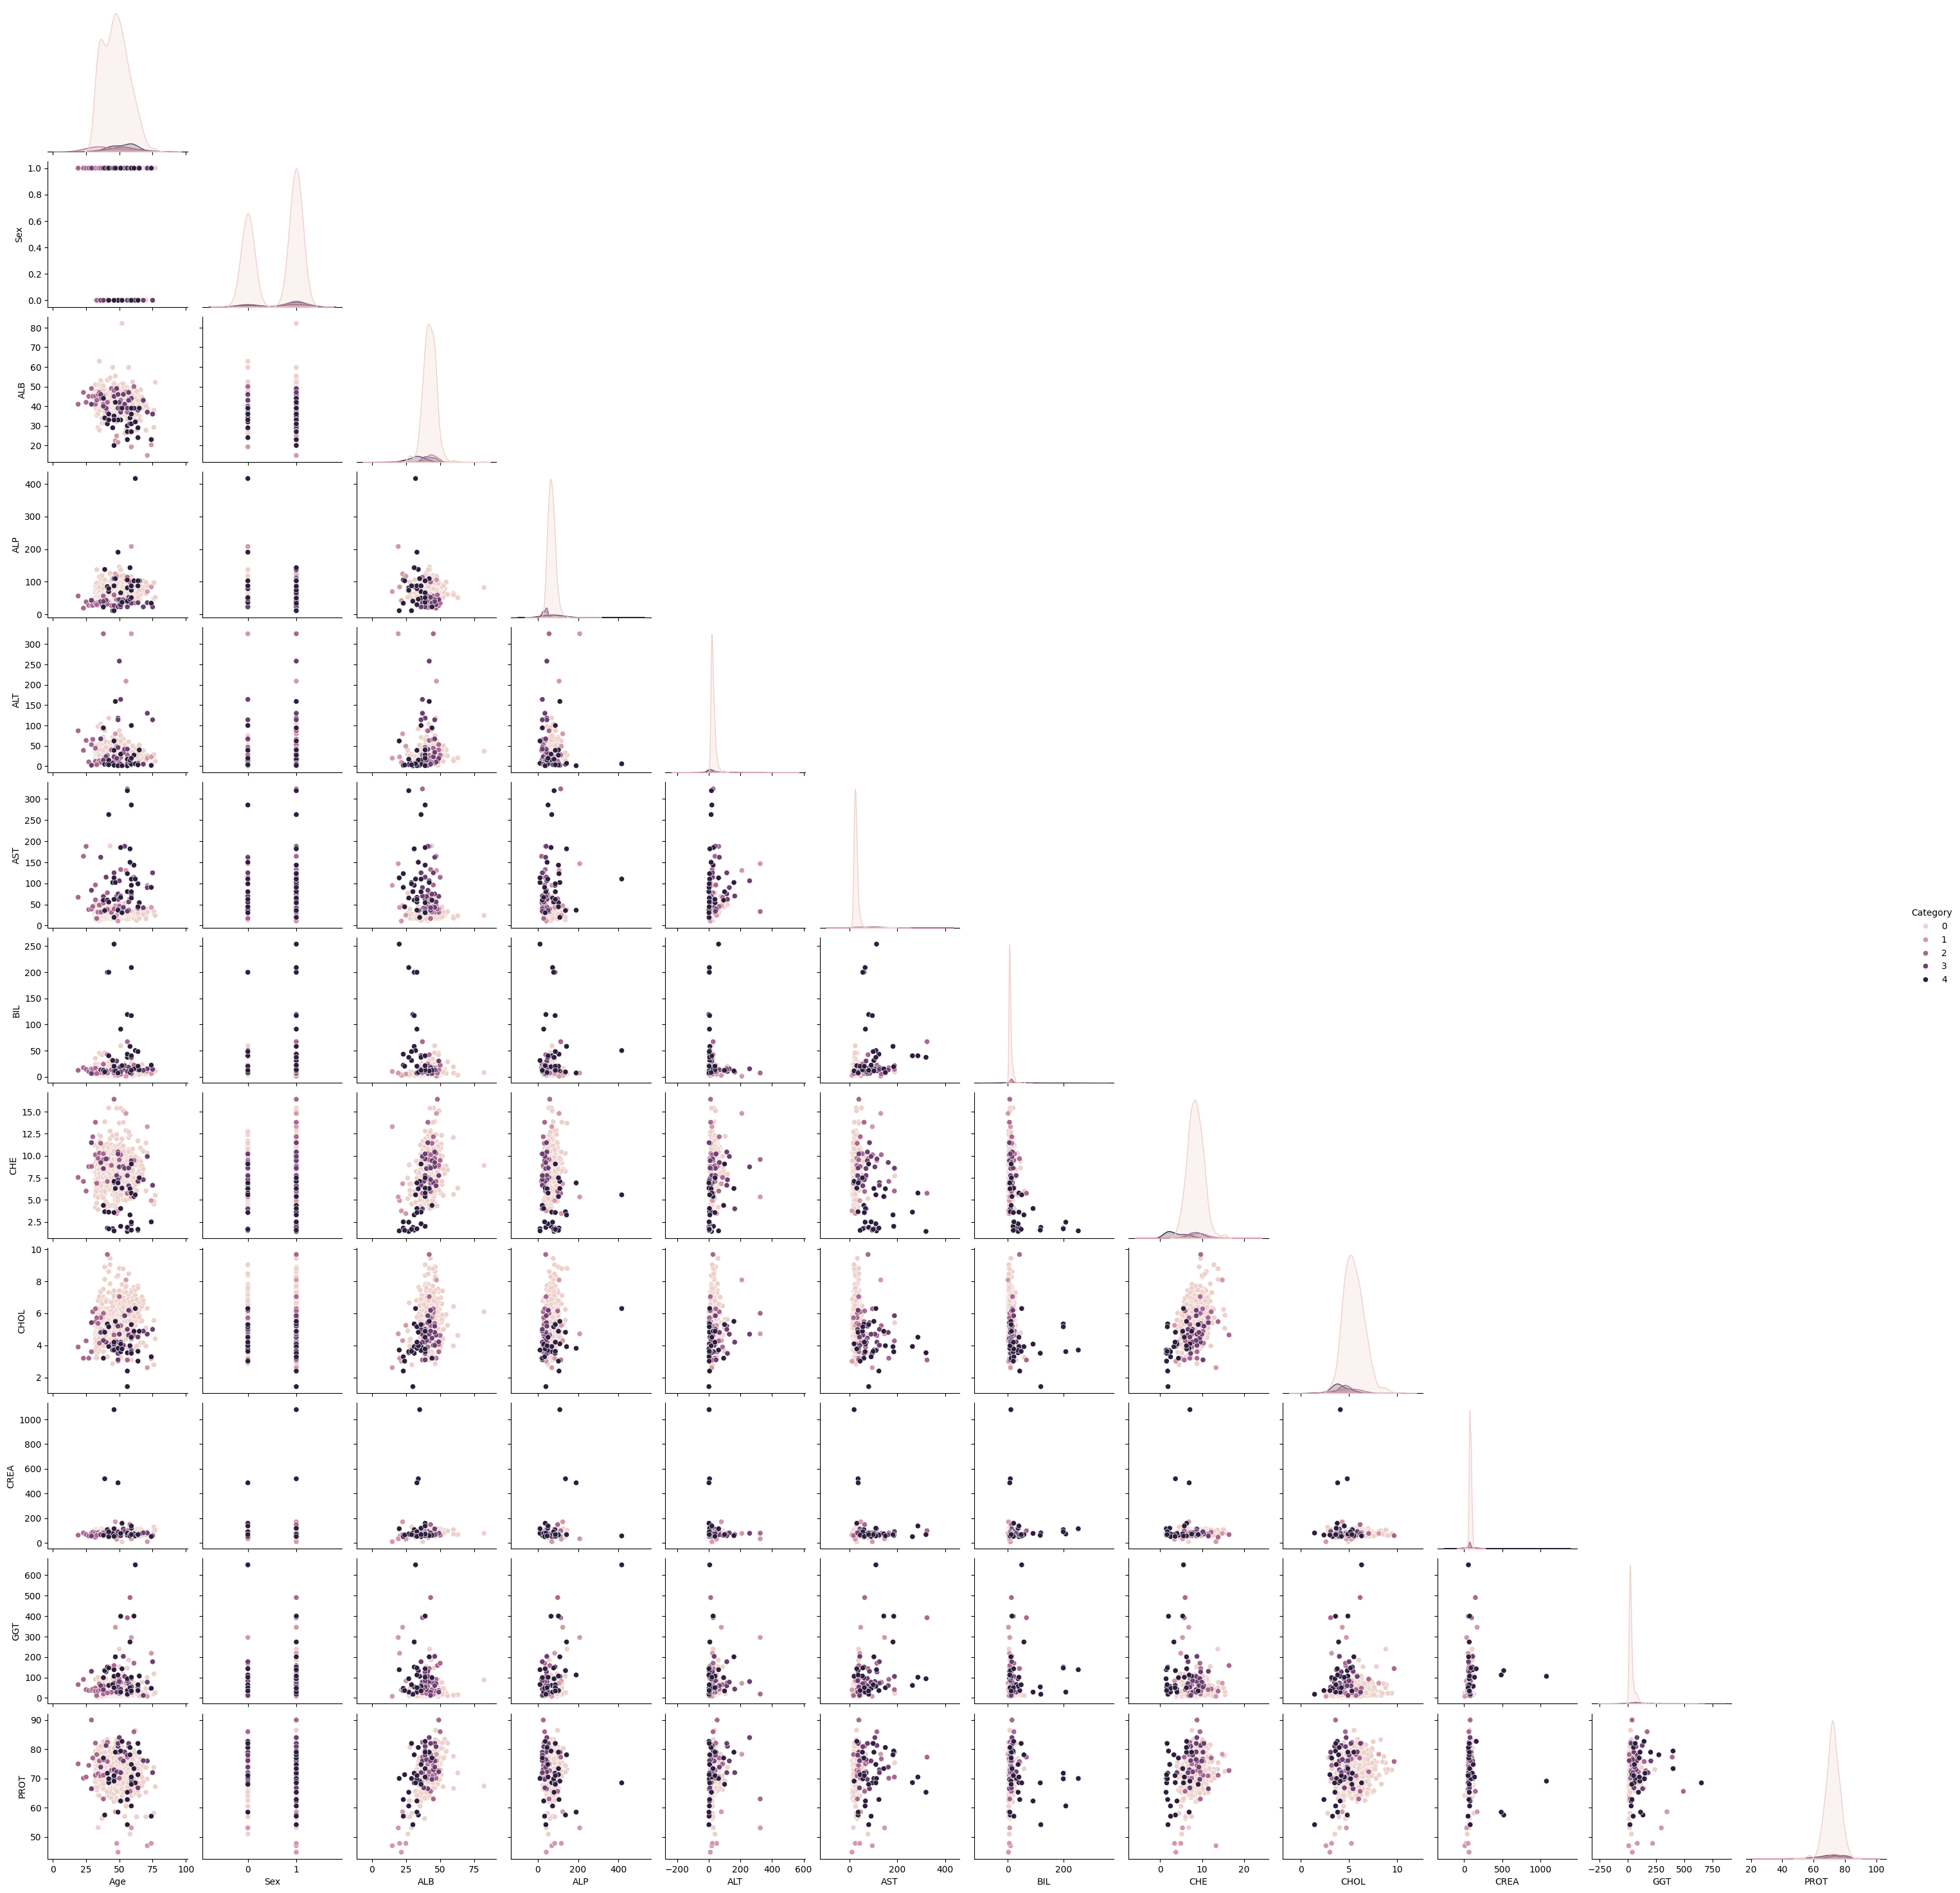

In [23]:
_ = sns.pairplot(data=df, hue="Category", corner=True)

coor between PROT and ALB is .6 and others not seems like has strong relations

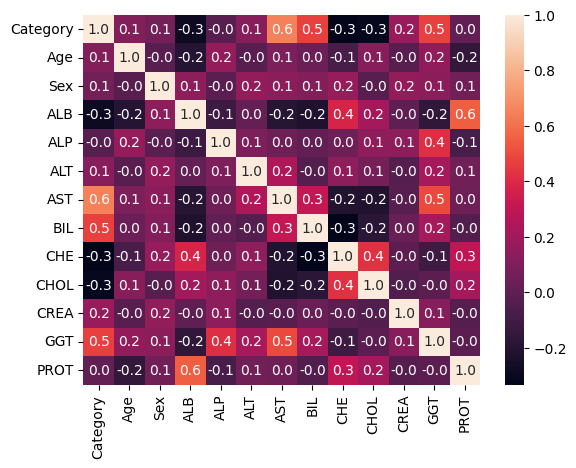

In [24]:
_  = sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [9]:
# 不进行数据增广， 直接建模
# 进行数据增广，在进行数据建模
# 数据增广进行 grid search 
# 建模方式进行 grid search

let's plot the class distribtion, from the bar chart below we can tell that this is a unbalanced problem

<Axes: xlabel='Category'>

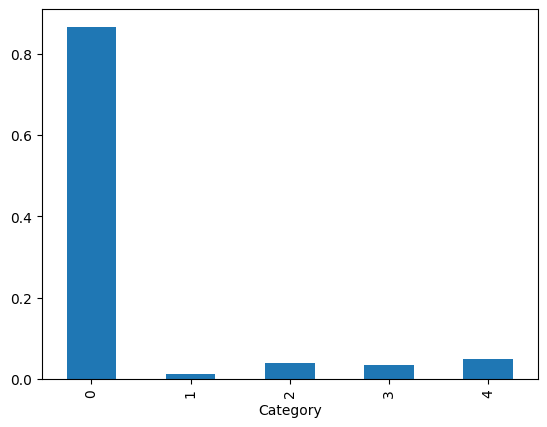

In [25]:
# array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis','2=Fibrosis', '3=Cirrhosis'], dtype='<U22')
df["Category"].value_counts(normalize=True).sort_index().plot(kind="bar")

In [26]:
y = df["Category"]
X = df.drop("Category", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, stratify=y, shuffle=True, random_state=RS)

print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

X_train: (492, 12)
X_test: (123, 12)
y_train: (492,)
y_test: (123,)


## The Models

first let's try model the data without any change of the data.  
we will try logistic regression, svm and decisiontree

In [29]:
std_scaler = StandardScaler().fit(X_train)
X_train = std_scaler.transform(X_train)


In [30]:
lr = LogisticRegression(
    penalty="l2",
    multi_class = 'multinomial',
    solver = 'lbfgs',
    max_iter = 1000).fit(X_train, y_train)

In [31]:
X_test = std_scaler.transform(X_test)

y_hat = lr.predict(X_test)

In [56]:
def evaluate_metrics(yt, yp):
    fig, ax = plt.subplots()
    results_pos = {}
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    pd.DataFrame(results_pos).T.plot(kind="bar", ax=ax)
    plt.title(f"accuracy: {accuracy_score(yt, yp):.2f}")
    plt.show()
    return results_pos

def evaluate_metrics_ax(yt, yp, ax, name):
    results_pos = {}
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    pd.DataFrame(results_pos).T.plot(kind="bar", ax=ax)
    ax.set_title(f"{name} acc: {accuracy_score(yt, yp):.2f}")
    return results_pos

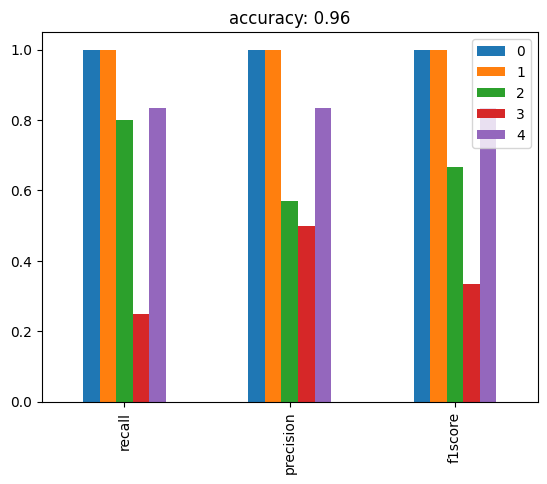

In [45]:
lr_performance = evaluate_metrics(y_test, y_hat)

we can see the class 0 (Blood Donor) and class 1 (suspect Blood Donor) has a very good preformance  
but other class not good. how about we change to other model ?

/home/keltsingai/anaconda3/envs/env_basecaller/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


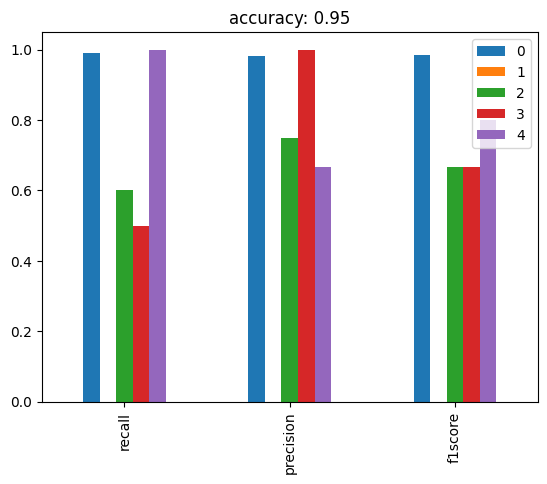

In [49]:
sv = SVC(kernel="rbf").fit(X_train, y_train)
y_hat = sv.predict(X_test)
sv_performance = evaluate_metrics(y_test, y_hat)

we can see that with svm, it has amost the same accuracy wiht logistic but it totally missing the class 1

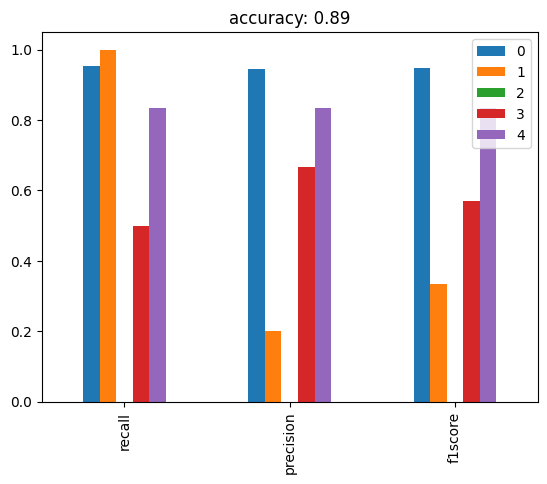

In [54]:
dt =  DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=15, 
    min_samples_leaf=3, 
    random_state=RS).fit(X_train, y_train)
y_hat = dt.predict(X_test)
dt_performance = evaluate_metrics(y_test, y_hat)

decisiontree missing the class 2 and achieve the lower accuracy in those three model.  
how about we take some data balancing approach and try those three models again?

/home/keltsingai/anaconda3/envs/env_basecaller/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/keltsingai/anaconda3/envs/env_basecaller/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


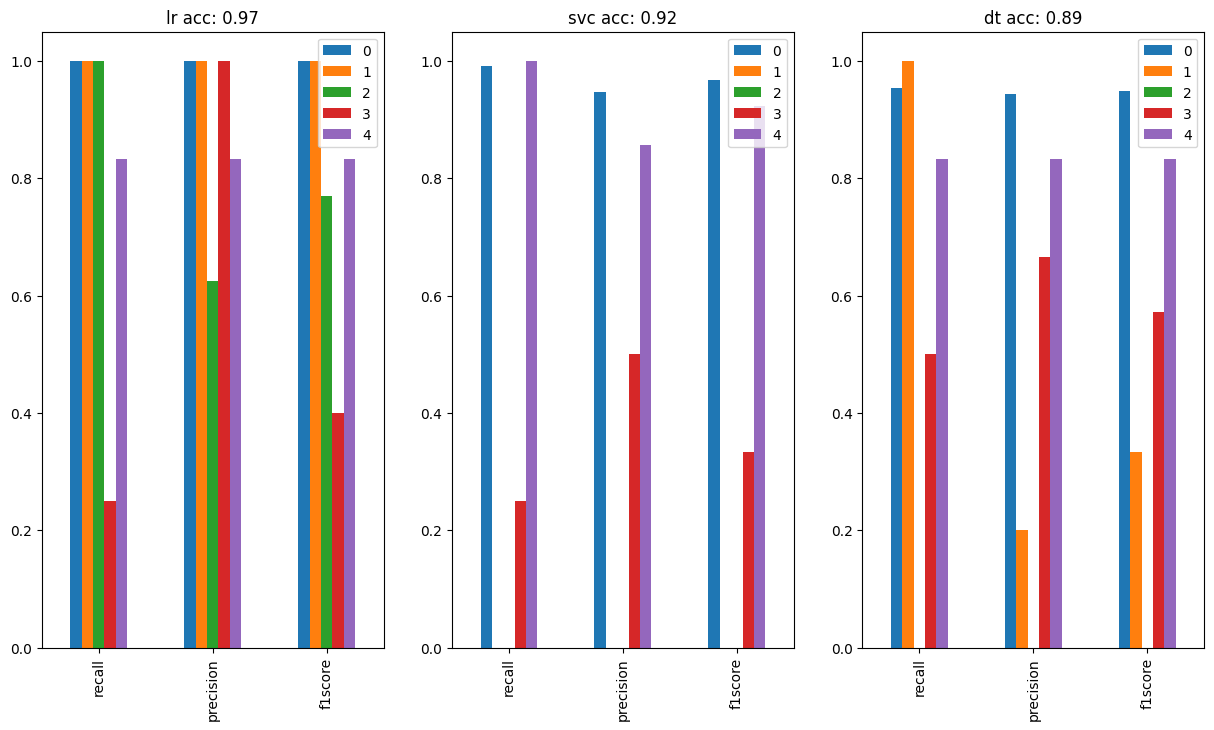

In [75]:
# let's combine the model above to a func

def combined_model(X_train,y_train,X_test,y_test, class_weight=None):
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(15,8))
    axs = axs.flatten()
    lr = LogisticRegression( # model NO.1
        penalty="l2",
        multi_class = 'multinomial',
        solver = 'lbfgs',
        max_iter = 3000,
        class_weight=class_weight
    ).fit(X_train, y_train)
    y_hat = lr.predict(X_test)
    lr_performance = evaluate_metrics_ax(y_test, y_hat, axs[0], "lr")

    sv = SVC(kernel="rbf",class_weight=class_weight).fit(X_train, y_train) # model NO.2
    y_hat = sv.predict(X_test)
    sv_performance = evaluate_metrics_ax(y_test, y_hat, axs[1], "svc")
    
    dt =  DecisionTreeClassifier( # model NO.3
        criterion='entropy', 
        max_depth=15, 
        min_samples_leaf=3, 
        random_state=RS,
        class_weight=class_weight).fit(X_train, y_train)
    y_hat = dt.predict(X_test)
    dt_performance = evaluate_metrics_ax(y_test, y_hat, axs[2], "dt")
    
    plt.show()
combined_model(X_train,y_train,X_test,y_test) # it worked.

Let try SMOTE approach

In [64]:
from imblearn.over_sampling import SMOTE

smote_sampler = SMOTE(random_state = RS)

In [65]:
# redo the data split step, because in the steps above, we scale the data.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, stratify=y, shuffle=True, random_state=RS)


<Axes: xlabel='Category'>

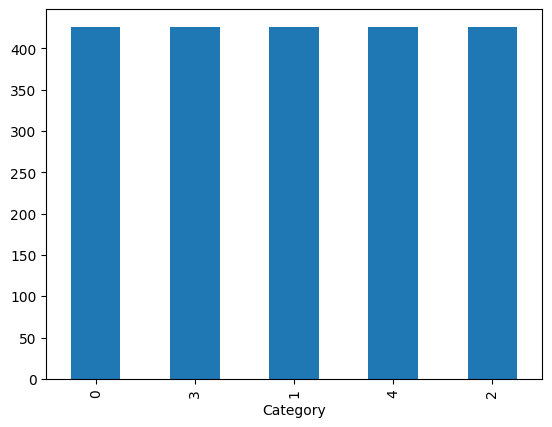

In [71]:
# the important thing is that we only perform the smote on training data

X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
y_smo.value_counts().plot(kind='bar')

after smote, the data volume is same between different class

In [72]:
std_scaler = StandardScaler().fit(X_smo)
X_tran_std = std_scaler.transform(X_smo)
X_test_std = std_scaler.transform(X_test)


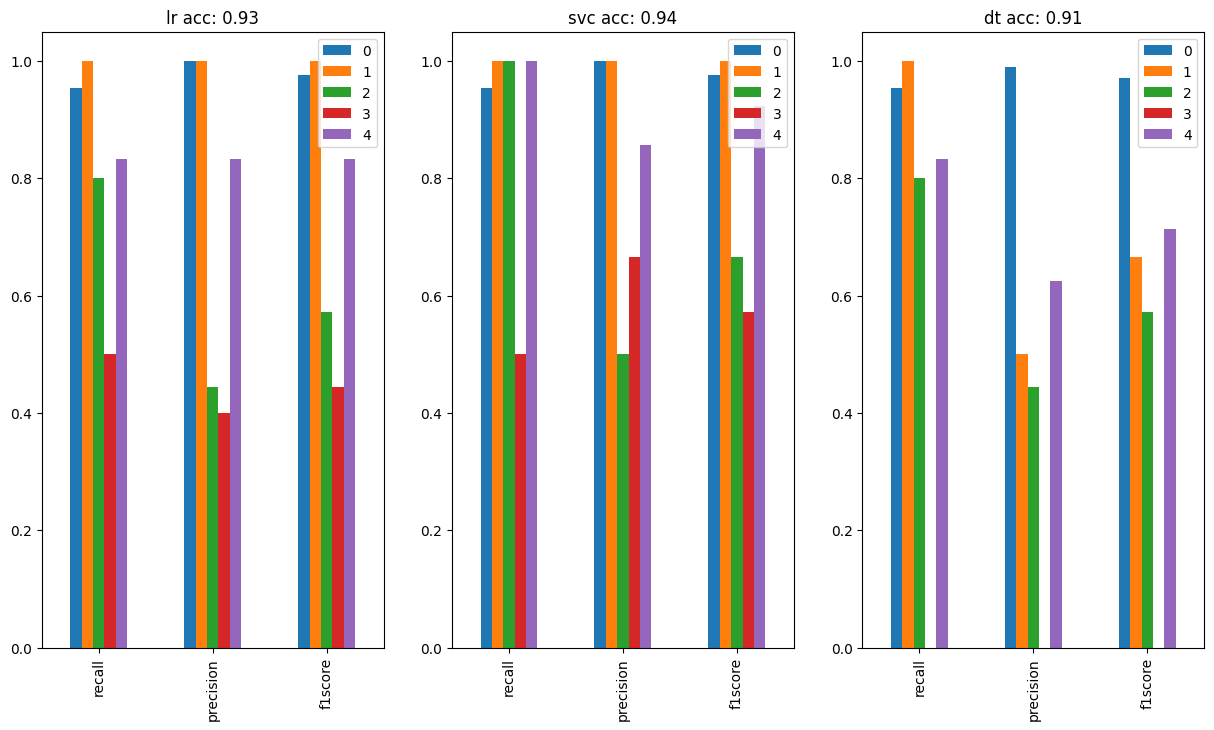

In [73]:
combined_model(X_tran_std,y_smo,X_test_std,y_test)

after smote, decisiontree still missing one calss, but it got 2pct acc improve and svc recognice all the class.  
lr has 3pct acc droped

Now, let's try class reweight

In [77]:
calss_cnt = y_train.value_counts().to_frame()

In [80]:
calss_cnt["weight"] = np.sqrt(calss_cnt["count"].sum()/calss_cnt["count"])

In [83]:
W = calss_cnt.to_dict()["weight"]

/home/keltsingai/anaconda3/envs/env_basecaller/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


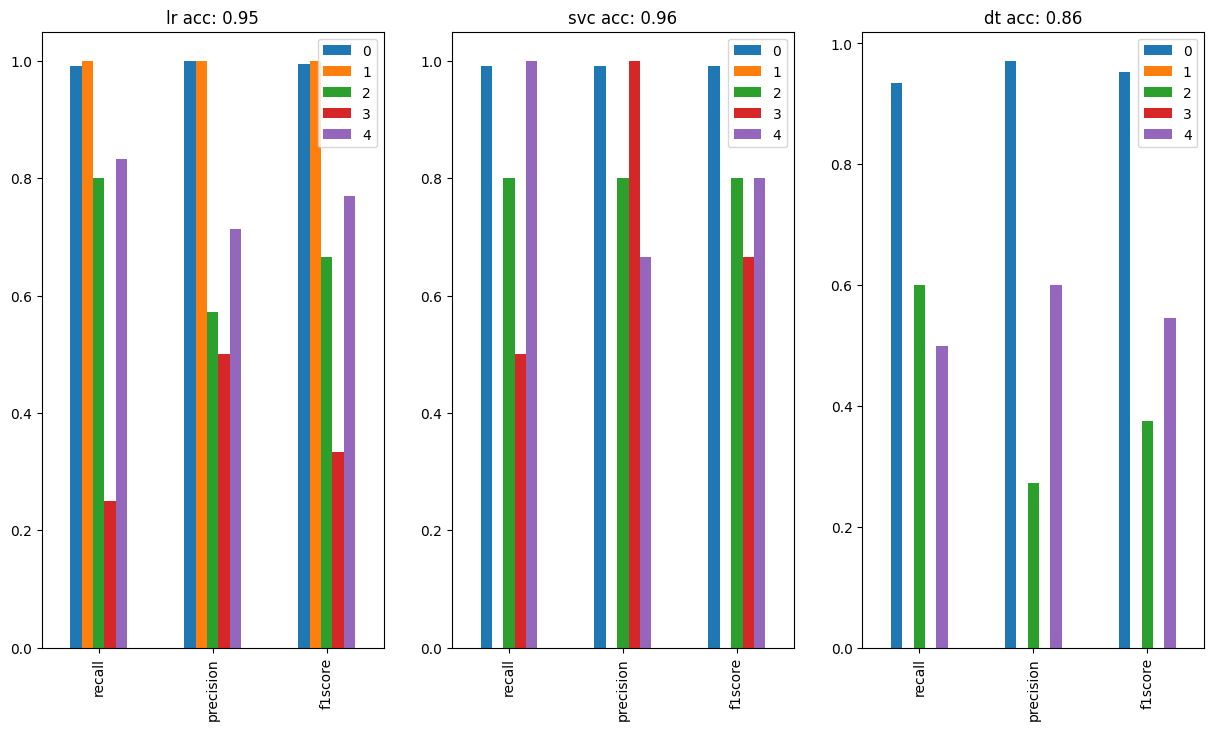

In [86]:
X_train, X_test, y_train, y_test
weight_sclaer = StandardScaler().fit(X_train)
w_X_train = weight_sclaer.transform(X_train)
w_X_test  = weight_sclaer.transform(X_test)

combined_model(w_X_train,y_train,w_X_test,y_test,W)

class reweight not wrok well

What if we conbine the smote and class reweight?

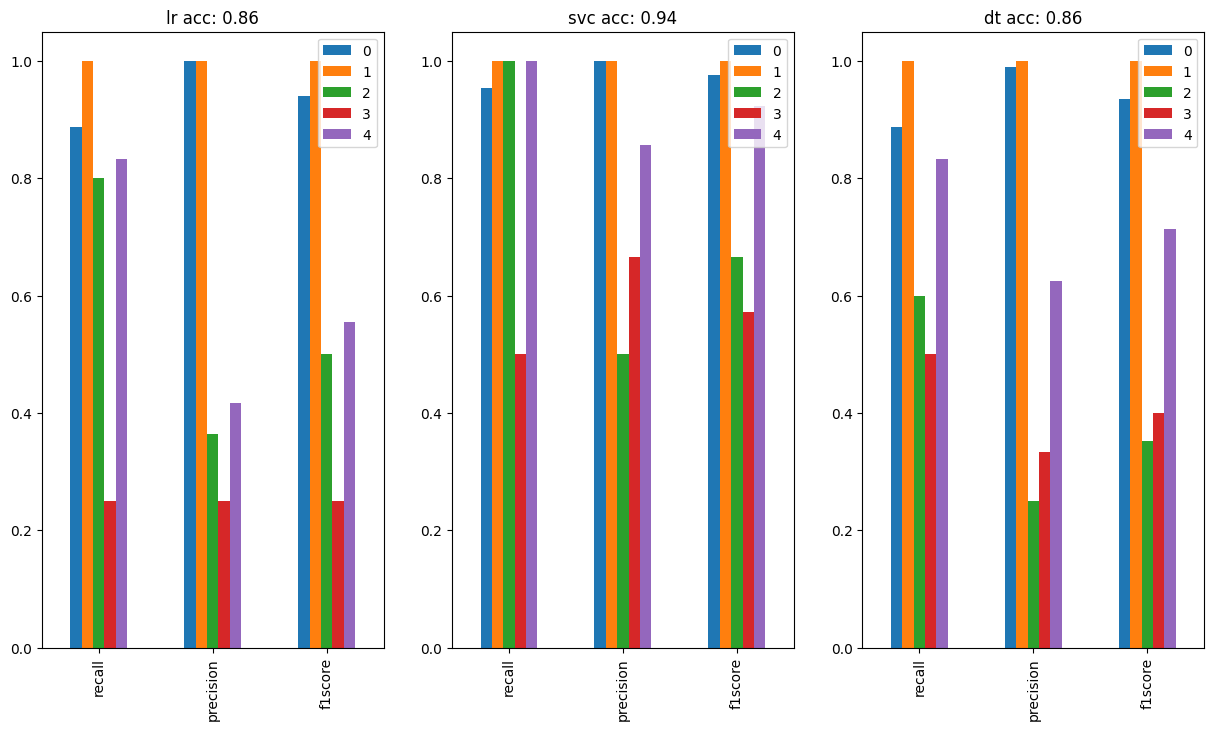

In [91]:
combined_model(X_tran_std,y_smo,X_test_std,y_test,W)

it seems better, svc model are the best model in those three models

## Key Findings 

1. data augmentation is very important on an imbalanced data.
2. we can combine different approachs on data to fruther improve the model. 

## Next Step

1. the feature is limited, maybe add some polynomial feature will help
2. try some ensemble based model.
3. further search the param of the model with gridcv